In [155]:
import pandas as pd

df = pd.read_csv("titanic-data2.csv")

look at data

In [156]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [158]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [159]:
df.shape

(891, 12)

drop irrelevant column, fix the age smaller than 1 and check the data


In [160]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis=1)

In [161]:
df = df.dropna(axis=0)

In [162]:
df[df['Age'] < 1] = 1

In [163]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

data visualization

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

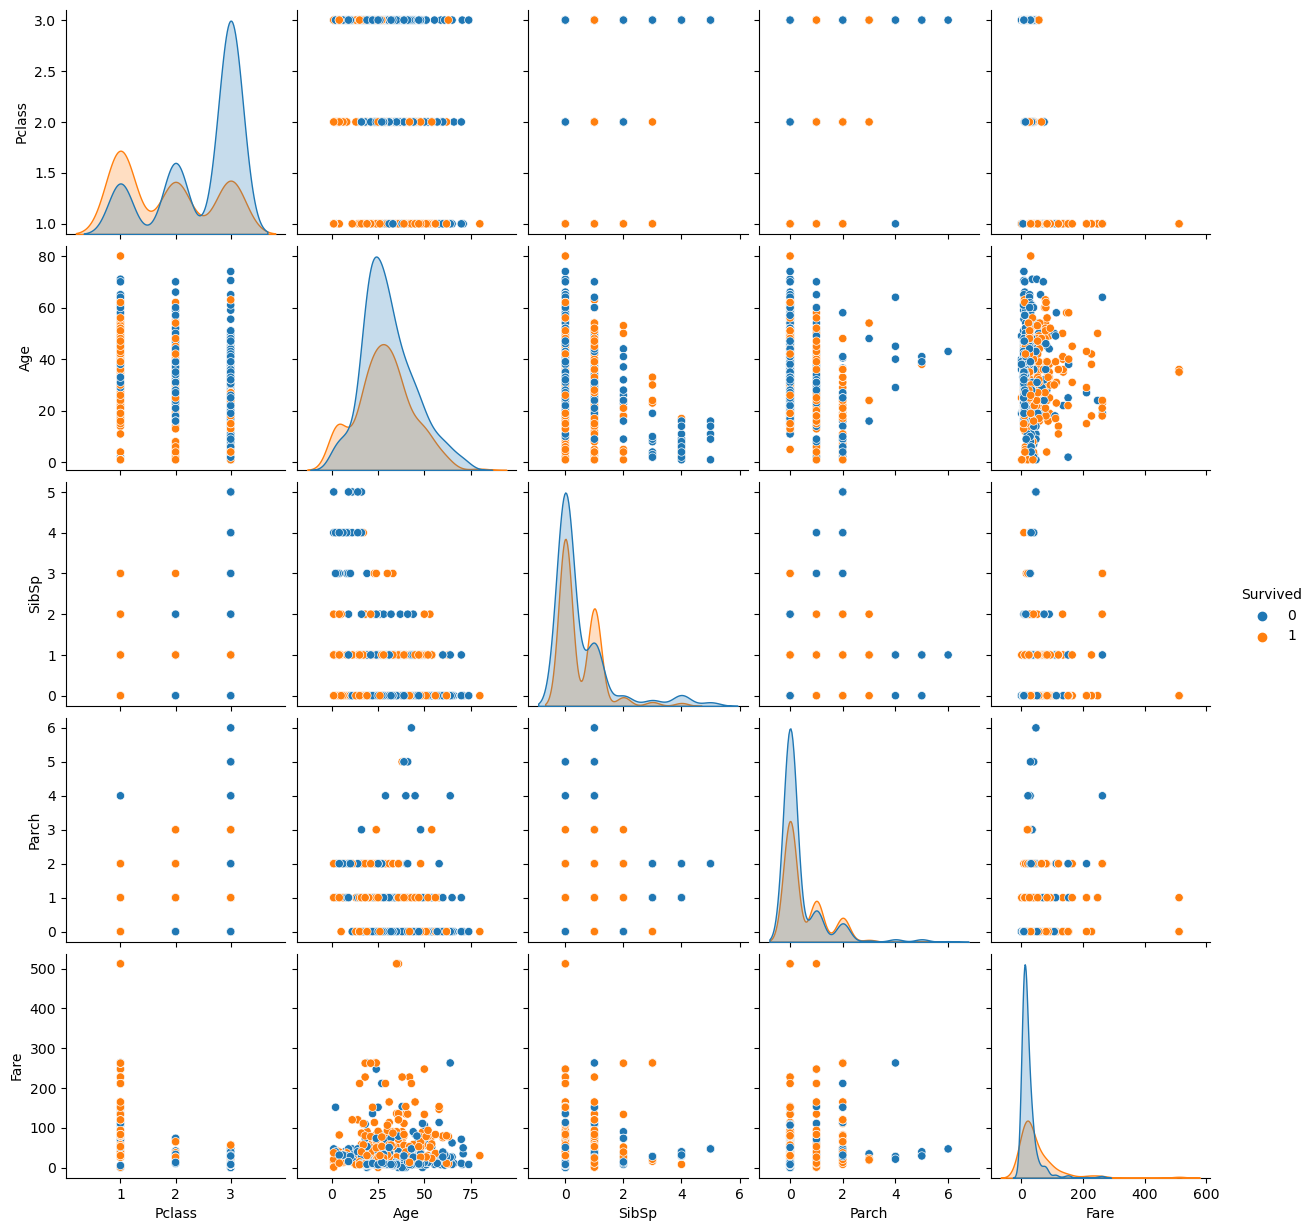

In [165]:
sns.pairplot(df, hue="Survived")
plt.show()

In [166]:
num_passengers = df.shape[0]
print("Number of passengers in Titanic dataset:", num_passengers)

Number of passengers in Titanic dataset: 714


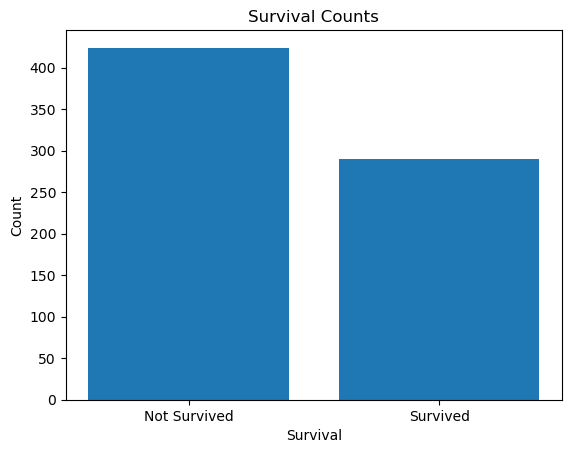

In [167]:
survived_counts = df['Survived'].value_counts()

plt.bar(survived_counts.index, survived_counts.values)
plt.xticks(survived_counts.index, ['Not Survived', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Count')
plt.title('Survival Counts')
plt.show()

In [168]:
df[df['Sex'] == 1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
78,1,1,1,1.0,1,1,1.0
305,1,1,1,1.0,1,1,1.0
469,1,1,1,1.0,1,1,1.0
644,1,1,1,1.0,1,1,1.0
755,1,1,1,1.0,1,1,1.0
803,1,1,1,1.0,1,1,1.0
831,1,1,1,1.0,1,1,1.0


In [169]:
df = df.drop(df[df['Sex'] == 1].index)

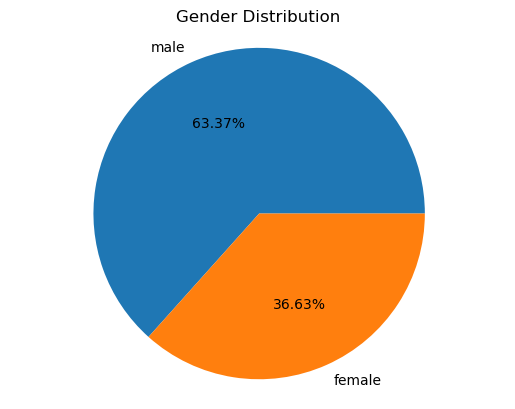

In [177]:
# Count the number of females and males
gender_counts = df['Sex'].value_counts()

# Create a pie plot
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.2f%%')
plt.axis('equal')
plt.title('Gender Distribution')
plt.show()

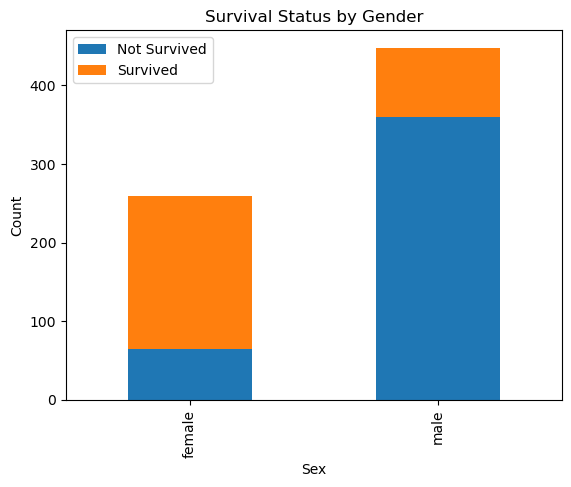

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

survival_counts = pd.crosstab(df['Sex'], df['Survived'])

fig, ax = plt.subplots()

survival_counts.plot(kind='bar', stacked=True, ax=ax)

ax.set_xlabel('Sex')
ax.set_ylabel('Count')
ax.set_title('Survival Status by Gender')
ax.legend(['Not Survived', 'Survived'])

plt.show()


In [175]:
df['Sex'].value_counts()

male      448
female    259
Name: Sex, dtype: int64

array(['male', 'female'], dtype=object)